<a href="https://colab.research.google.com/github/Beczheng/datasci_3_eda/blob/main/HHA_507_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading packages

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from pandas_profiling import ProfileReport

<ipython-input-1-749eb4667af5>:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# 2. Loading the dataset

In [2]:
# Loading the dataset as a CSV file

df = pd.read_csv('healthcare_data_cleaning.csv')
df

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
0,45,Other,West Brian,Kentucky,Yes,Yes,Insurance,Dr. Williams,Flu,Med_E,General,66,111,183,70,65.45721578126224,193,92,5,15.71751735532889
1,25,Female,East Jocelynfurt,Colorado,No,Yes,Card,Dr. Johnson,Flu,Med_B,Specialist,59,missing,174,58,430.68365678679174,195,missing,4,80.78647284463952
2,51,Other,South Lindseyland,Ohio,Yes,No,Cash,Dr. Williams,Covid-19,Med_D,General,79,119,161,56,315.0709305262176,missing,37,2,64.3921393009105
3,18,Female,Taylorfort,Pennsylvania,Yes,missing,Cash,Dr. Williams,Flu,Med_A,General,99,115,171,52,320.2998987723972,175,108,2,8.872859215315316
4,48,Female,Birdmouth,Montana,No,No,Insurance,Dr. Brown,None,Med_C,Specialist,93,89,186,87,264.2147372473319,188,113,3,77.48311304645532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,74,Other,West Anthony,Oklahoma,Yes,No,Card,Dr. Williams,Covid-19,Med_E,Specialist,65,112,169,61,309.16444606680665,183,10,3,63.20478776719894
104996,37,Male,Mckeetown,Utah,Yes,No,Cash,Dr. Jones,Covid-19,Med_C,General,missing,111,165,67,missing,191,47,2,113.86764025370326
104997,51,Female,Lake Lisachester,Nebraska,Yes,Yes,Insurance,Dr. Williams,Allergy,Med_D,Follow-Up,89,118,179,71,320.8304180033907,172,39,3,35.622420232475356
104998,missing,Female,Heidiborough,missing,Yes,No,Cash,Dr. Smith,Covid-19,Med_A,Follow-Up,74,123,167,75,5.341231420036174,180,79,missing,124.4083409893742


# 3. Cleaning the dataset

## Removing duplicates

In [3]:
# Removing duplicates in the dataset

df2 = df.drop_duplicates()
df2

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
0,45,Other,West Brian,Kentucky,Yes,Yes,Insurance,Dr. Williams,Flu,Med_E,General,66,111,183,70,65.45721578126224,193,92,5,15.71751735532889
1,25,Female,East Jocelynfurt,Colorado,No,Yes,Card,Dr. Johnson,Flu,Med_B,Specialist,59,missing,174,58,430.68365678679174,195,missing,4,80.78647284463952
2,51,Other,South Lindseyland,Ohio,Yes,No,Cash,Dr. Williams,Covid-19,Med_D,General,79,119,161,56,315.0709305262176,missing,37,2,64.3921393009105
3,18,Female,Taylorfort,Pennsylvania,Yes,missing,Cash,Dr. Williams,Flu,Med_A,General,99,115,171,52,320.2998987723972,175,108,2,8.872859215315316
4,48,Female,Birdmouth,Montana,No,No,Insurance,Dr. Brown,None,Med_C,Specialist,93,89,186,87,264.2147372473319,188,113,3,77.48311304645532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104994,53,Female,Michelleburgh,South Dakota,No,No,Card,Dr. Williams,Flu,Med_B,Emergency,68,109,172,75,488.0316041186948,167,25,5,69.54228578689846
104995,74,Other,West Anthony,Oklahoma,Yes,No,Card,Dr. Williams,Covid-19,Med_E,Specialist,65,112,169,61,309.16444606680665,183,10,3,63.20478776719894
104996,37,Male,Mckeetown,Utah,Yes,No,Cash,Dr. Jones,Covid-19,Med_C,General,missing,111,165,67,missing,191,47,2,113.86764025370326
104997,51,Female,Lake Lisachester,Nebraska,Yes,Yes,Insurance,Dr. Williams,Allergy,Med_D,Follow-Up,89,118,179,71,320.8304180033907,172,39,3,35.622420232475356


## Renaming missing values

In [4]:
# Renaming missing values from "missing" to "NA" in the dataset

df3 = df2.replace('missing', np.nan)
df3

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
0,45,Other,West Brian,Kentucky,Yes,Yes,Insurance,Dr. Williams,Flu,Med_E,General,66,111,183,70,65.45721578126224,193,92,5,15.71751735532889
1,25,Female,East Jocelynfurt,Colorado,No,Yes,Card,Dr. Johnson,Flu,Med_B,Specialist,59,NaN,174,58,430.68365678679174,195,NaN,4,80.78647284463952
2,51,Other,South Lindseyland,Ohio,Yes,No,Cash,Dr. Williams,Covid-19,Med_D,General,79,119,161,56,315.0709305262176,NaN,37,2,64.3921393009105
3,18,Female,Taylorfort,Pennsylvania,Yes,NaN,Cash,Dr. Williams,Flu,Med_A,General,99,115,171,52,320.2998987723972,175,108,2,8.872859215315316
4,48,Female,Birdmouth,Montana,No,No,Insurance,Dr. Brown,None,Med_C,Specialist,93,89,186,87,264.2147372473319,188,113,3,77.48311304645532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104994,53,Female,Michelleburgh,South Dakota,No,No,Card,Dr. Williams,Flu,Med_B,Emergency,68,109,172,75,488.0316041186948,167,25,5,69.54228578689846
104995,74,Other,West Anthony,Oklahoma,Yes,No,Card,Dr. Williams,Covid-19,Med_E,Specialist,65,112,169,61,309.16444606680665,183,10,3,63.20478776719894
104996,37,Male,Mckeetown,Utah,Yes,No,Cash,Dr. Jones,Covid-19,Med_C,General,NaN,111,165,67,NaN,191,47,2,113.86764025370326
104997,51,Female,Lake Lisachester,Nebraska,Yes,Yes,Insurance,Dr. Williams,Allergy,Med_D,Follow-Up,89,118,179,71,320.8304180033907,172,39,3,35.622420232475356


## Dropping missing values

In [5]:
# Dropping missing values in the dataset

df4 = df3.dropna()
df4

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
0,45,Other,West Brian,Kentucky,Yes,Yes,Insurance,Dr. Williams,Flu,Med_E,General,66,111,183,70,65.45721578126224,193,92,5,15.71751735532889
4,48,Female,Birdmouth,Montana,No,No,Insurance,Dr. Brown,None,Med_C,Specialist,93,89,186,87,264.2147372473319,188,113,3,77.48311304645532
7,52,Male,Vanessaburgh,Connecticut,Yes,Yes,Insurance,Dr. Williams,Flu,Med_E,General,99,129,170,47,387.08504353508863,179,108,2,76.96592632951703
8,20,Female,West Briannabury,Montana,No,Yes,Card,Dr. Jones,Flu,Med_C,Specialist,67,108,173,86,172.5483427968999,174,91,2,142.31710767890775
11,40,Female,Jonesmouth,Rhode Island,No,No,Card,Dr. Jones,Covid-19,Med_E,Specialist,65,106,166,82,299.1426761400895,193,92,1,77.71536034261702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104992,44,Female,Port Tracistad,Alaska,Yes,No,Insurance,Dr. Brown,Cold,Med_A,Follow-Up,76,93,178,66,462.56567087397013,189,55,3,59.74631825267156
104993,42,Female,West Annaport,Florida,Yes,No,Cash,Dr. Johnson,Covid-19,Med_D,Specialist,80,129,171,78,131.35632576282202,185,22,6,104.43016736588544
104994,53,Female,Michelleburgh,South Dakota,No,No,Card,Dr. Williams,Flu,Med_B,Emergency,68,109,172,75,488.0316041186948,167,25,5,69.54228578689846
104995,74,Other,West Anthony,Oklahoma,Yes,No,Card,Dr. Williams,Covid-19,Med_E,Specialist,65,112,169,61,309.16444606680665,183,10,3,63.20478776719894


## Double checking for missing values

In [6]:
# Double checking for missing values

df4.isna().sum()

Patient Age              0
Gender                   0
City of Residence        0
State of Residence       0
Has Insurance            0
Visited Last Month       0
Payment Method           0
Preferred Doctor         0
Disease Diagnosed        0
Medication Prescribed    0
Type of Appointment      0
Average Heart Rate       0
Average BP               0
Height (in cm)           0
Weight (in kg)           0
Payment Due ($)          0
Last Visit (days ago)    0
Visit Duration (mins)    0
Number of Tests          0
Prescription Cost ($)    0
dtype: int64

## Cleaning the columns

In [7]:
# Cleaning the columns by removing white space and special characters

def clean_column(df):
  def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()

  df.columns = [clean_name(col) for col in df.columns]
  return df

df5 = clean_column(df4)
df5

,patientage,gender,cityofresidence,stateofresidence,hasinsurance,visitedlastmonth,paymentmethod,preferreddoctor,diseasediagnosed,medicationprescribed,typeofappointment,averageheartrate,averagebp,heightincm,weightinkg,paymentdue,lastvisitdaysago,visitdurationmins,numberoftests,prescriptioncost
0,45,Other,West Brian,Kentucky,Yes,Yes,Insurance,Dr. Williams,Flu,Med_E,General,66,111,183,70,65.45721578126224,193,92,5,15.71751735532889
4,48,Female,Birdmouth,Montana,No,No,Insurance,Dr. Brown,None,Med_C,Specialist,93,89,186,87,264.2147372473319,188,113,3,77.48311304645532
7,52,Male,Vanessaburgh,Connecticut,Yes,Yes,Insurance,Dr. Williams,Flu,Med_E,General,99,129,170,47,387.08504353508863,179,108,2,76.96592632951703
8,20,Female,West Briannabury,Montana,No,Yes,Card,Dr. Jones,Flu,Med_C,Specialist,67,108,173,86,172.5483427968999,174,91,2,142.31710767890775
11,40,Female,Jonesmouth,Rhode Island,No,No,Card,Dr. Jones,Covid-19,Med_E,Specialist,65,106,166,82,299.1426761400895,193,92,1,77.71536034261702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104992,44,Female,Port Tracistad,Alaska,Yes,No,Insurance,Dr. Brown,Cold,Med_A,Follow-Up,76,93,178,66,462.56567087397013,189,55,3,59.74631825267156
104993,42,Female,West Annaport,Florida,Yes,No,Cash,Dr. Johnson,Covid-19,Med_D,Specialist,80,129,171,78,131.35632576282202,185,22,6,104.43016736588544
104994,53,Female,Michelleburgh,South Dakota,No,No,Card,Dr. Williams,Flu,Med_B,Emergency,68,109,172,75,488.0316041186948,167,25,5,69.54228578689846
104995,74,Other,West Anthony,Oklahoma,Yes,No,Card,Dr. Williams,Covid-19,Med_E,Specialist,65,112,169,61,309.16444606680665,183,10,3,63.20478776719894


In [8]:
# Renaming the column headers

df6 = df5.rename(columns = {'patientage' : 'patient_age', 'cityofresidence' : 'city', 'stateofresidence' : 'state', 'hasinsurance' : 'has_insurance', 'visitedlastmonth' : 'visited_last_month', 'paymentmethod' : 'payment_method', 'preferreddoctor' : 'preferred_doctor', 'diseasediagnosed' : 'disease_diagnosed', 'medicationprescribed' : 'medication_prescribed', 'typeofappointment' : 'type_of_appointment', 'averageheartrate' : 'average_hr', 'averagebp' : 'average_bp', 'heightincm': 'height_in_cm', 'weightinkg' : 'weight_in_kg', 'paymentdue' : 'payment_due', 'lastvisitdaysago' : 'last_visit_in_days_ago', 'visitdurationmins' : 'visit_duration_in_mins', 'numberoftests' : 'number_of_tests', 'prescriptioncost' : 'prescription_cost'})
df6

,patient_age,gender,city,state,has_insurance,visited_last_month,payment_method,preferred_doctor,disease_diagnosed,medication_prescribed,type_of_appointment,average_hr,average_bp,height_in_cm,weight_in_kg,payment_due,last_visit_in_days_ago,visit_duration_in_mins,number_of_tests,prescription_cost
0,45,Other,West Brian,Kentucky,Yes,Yes,Insurance,Dr. Williams,Flu,Med_E,General,66,111,183,70,65.45721578126224,193,92,5,15.71751735532889
4,48,Female,Birdmouth,Montana,No,No,Insurance,Dr. Brown,None,Med_C,Specialist,93,89,186,87,264.2147372473319,188,113,3,77.48311304645532
7,52,Male,Vanessaburgh,Connecticut,Yes,Yes,Insurance,Dr. Williams,Flu,Med_E,General,99,129,170,47,387.08504353508863,179,108,2,76.96592632951703
8,20,Female,West Briannabury,Montana,No,Yes,Card,Dr. Jones,Flu,Med_C,Specialist,67,108,173,86,172.5483427968999,174,91,2,142.31710767890775
11,40,Female,Jonesmouth,Rhode Island,No,No,Card,Dr. Jones,Covid-19,Med_E,Specialist,65,106,166,82,299.1426761400895,193,92,1,77.71536034261702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104992,44,Female,Port Tracistad,Alaska,Yes,No,Insurance,Dr. Brown,Cold,Med_A,Follow-Up,76,93,178,66,462.56567087397013,189,55,3,59.74631825267156
104993,42,Female,West Annaport,Florida,Yes,No,Cash,Dr. Johnson,Covid-19,Med_D,Specialist,80,129,171,78,131.35632576282202,185,22,6,104.43016736588544
104994,53,Female,Michelleburgh,South Dakota,No,No,Card,Dr. Williams,Flu,Med_B,Emergency,68,109,172,75,488.0316041186948,167,25,5,69.54228578689846
104995,74,Other,West Anthony,Oklahoma,Yes,No,Card,Dr. Williams,Covid-19,Med_E,Specialist,65,112,169,61,309.16444606680665,183,10,3,63.20478776719894


# 4. Conducting univariate analyses

## Checking and changing the data type

In [9]:
# Checking the data type for the "average_hr" and "average_bp" columns

df6[['average_hr', 'average_bp']].dtypes

average_hr    object
average_bp    object
dtype: object

In [10]:
# Changing the data type to numeric for the "average_hr" and "average_bp" columns

df6[['average_hr', 'average_bp']] = df6[['average_hr', 'average_bp']].apply(pd.to_numeric)
print(df6[['average_hr', 'average_bp']])

        average_hr  average_bp
0               66         111
4               93          89
7               99         129
8               67         108
11              65         106
...            ...         ...
104992          76          93
104993          80         129
104994          68         109
104995          65         112
104997          89         118

[35828 rows x 2 columns]


In [11]:
# Checking the data type for the "average_hr" and "average_bp" columns again

df6[['average_hr', 'average_bp']].dtypes

average_hr    int64
average_bp    int64
dtype: object

## Summary statistics

In [12]:
# Conducting summary statistics for average heart rate ("average_hr") and average blood pressure ("average_bp")

print('Summary statistics:')
print(df6[['average_hr', 'average_bp']].describe())

Summary statistics:
         average_hr    average_bp
count  35828.000000  35828.000000
mean      79.487831    109.576979
std       10.003078     14.432866
min       50.000000     80.000000
25%       73.000000     99.000000
50%       80.000000    110.000000
75%       86.000000    120.000000
max      120.000000    140.000000


## Measures of central tendency

In [13]:
# Calculating measures of central tendency (mean, median, and mode) for average heart rate

mean_value_average_hr = df6['average_hr'].mean()
median_value_average_hr = df6['average_hr'].median()
mode_value_average_hr = df6['average_hr'].mode().iloc[0]

# Calculating measures of central tendency (mean, median, and mode) for average blood pressure

mean_value_average_bp = df6['average_bp'].mean()
median_value_average_bp = df6['average_bp'].median()
mode_value_average_bp = df6['average_bp'].mode().iloc[0]

In [14]:
# Printing the results of the measures of central tendency for average heart rate

print('Mean for average heart rate:', mean_value_average_hr)
print('Median for average heart rate:', median_value_average_hr)
print('Mode for average heart rate:', mode_value_average_hr)

Mean for average heart rate: 79.48783074690186
Median for average heart rate: 80.0
Mode for average heart rate: 80


In [15]:
# Printing the results of the measures of central tendency for average blood pressure

print('Mean for average blood pressure:', mean_value_average_bp)
print('Median for average blood pressure:', median_value_average_bp)
print('Mode for average blood pressure:', mode_value_average_bp)

Mean for average blood pressure: 109.576978899185
Median for average blood pressure: 110.0
Mode for average blood pressure: 80


## Measures of spread

In [16]:
# Calculating measures of spread (range, variance, standard deviation) for average heart rate

range_average_hr = df6['average_hr'].max() - df6['average_hr'].min()
var_average_hr = np.var(df6['average_hr'])
std_average_hr = np.std(df6['average_hr'])
percentile_25_average_hr = np.percentile(df6['average_hr'], 25)
percentile_75_average_hr = np.percentile(df6['average_hr'], 75)

# Calculating IQR for average heart rate

q1_average_hr = np.percentile(df6['average_hr'], 25)
q3_average_hr = np.percentile(df6['average_hr'], 75)
iqr_average_hr = q3_average_hr - q1_average_hr

# Calculating measures of spread (range, variance, standard deviation) for average blood pressure

range_average_bp = df6['average_bp'].max() - df6['average_bp'].min()
var_average_bp = np.var(df6['average_bp'])
std_average_bp = np.std(df6['average_bp'])
percentile_25_average_bp = np.percentile(df6['average_bp'], 25)
percentile_75_average_bp = np.percentile(df6['average_bp'], 75)

# Calculating IQR for average blood pressure

q1_average_bp = np.percentile(df6['average_bp'], 25)
q3_average_bp = np.percentile(df6['average_bp'], 75)
iqr_average_bp = q3_average_bp - q1_average_bp

In [17]:
# Printing the results of the measures of spread for average heart rate

print('Range for average heart rate:', range_average_hr)
print('Variance for average heart rate:', var_average_hr)
print('Standard deviation for average heart rate:', std_average_hr)
print('25th percentile for average heart rate:', percentile_25_average_hr)
print('75th percentile for average heart rate:', percentile_75_average_hr)
print('IQR for average heart rate:', iqr_average_hr)

Range for average heart rate: 70
Variance for average heart rate: 100.05877230673354
Standard deviation for average heart rate: 10.002938183690507
25th percentile for average heart rate: 73.0
75th percentile for average heart rate: 86.0
IQR for average heart rate: 13.0


In [18]:
# Printing the results of the measures of spread for for average blood pressure

print('Range for average blood pressure:', range_average_bp)
print('Variance for average blood pressure:', var_average_bp)
print('Standard deviation for average blood pressure:', std_average_bp)
print('25th percentile for average blood pressure:', percentile_25_average_bp)
print('75th percentile for average blood pressure:', percentile_75_average_bp)
print('IQR for average blood pressure:', iqr_average_bp)

Range for average blood pressure: 60
Variance for average blood pressure: 208.3017944679035
Standard deviation for average blood pressure: 14.432664150041859
25th percentile for average blood pressure: 99.0
75th percentile for average blood pressure: 120.0
IQR for average blood pressure: 21.0


## Graphs

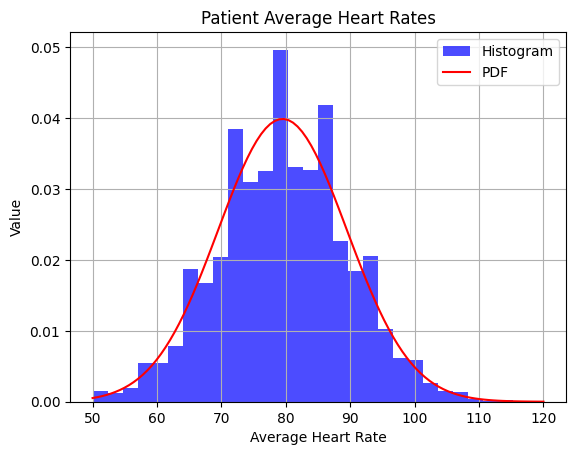

In [19]:
# Visualizing average heart rate through a histogram

# Normal distribution

mean = 79.48783074690186
std_dev = 10.003078
num_samples = 1000

# Creating a histogram

plt.hist(df6['average_hr'], bins=30, density=True, alpha=0.7, color='blue', label='Histogram')

# Create a probability density function (PDF) curve

x = np.linspace(min(df6['average_hr']), max(df6['average_hr']), 100)
pdf = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std_dev**2))
plt.plot(x, pdf, color='red', label='PDF')

plt.title('Patient Average Heart Rates')
plt.xlabel('Average Heart Rate')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

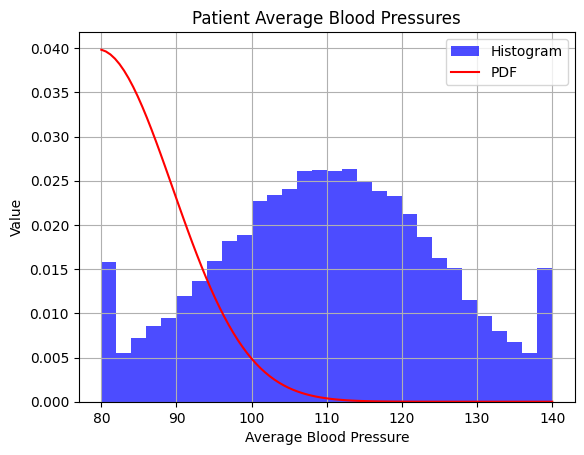

In [20]:
# Visualizing average blood pressure through a histogram

# Normal distribution

mean = 79.48783074690186
std_dev = 10.003078
num_samples = 1000

# Creating a histogram

plt.hist(df6['average_bp'], bins=30, density=True, alpha=0.7, color='blue', label='Histogram')

# Create a probability density function (PDF) curve

x = np.linspace(min(df6['average_bp']), max(df6['average_bp']), 100)
pdf = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std_dev**2))
plt.plot(x, pdf, color='red', label='PDF')

plt.title('Patient Average Blood Pressures')
plt.xlabel('Average Blood Pressure')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# 5. Conducting bivariate analyses

## Calculating and analyzing correlations

In [21]:
# Calculating correlation between average heart rate and average blood pressure using the Pearson correlation coefficient
# Calculating the p value

pearson_corr, p_value = pearsonr(df6['average_hr'], df6['average_bp'])

In [22]:
# Printing the results of the correlation

print(f'Pearson correlation coefficient: {pearson_corr:.4f}')

# Printing the results of the p value

print(f'P-value: {p_value:.4f}')

Pearson correlation coefficient: -0.0048
P-value: 0.3639


In [23]:
# Analyzing the result of the correlation

def p_corr_function(x):
  if abs(x) >= 0.9 and abs(x) <= 1.0:
    result = 'Very strong correlation'
  elif abs(x) >= 0.7 and abs(x) < 0.9:
    result = 'Strong correlation'
  elif abs(x) >= 0.5 and abs(x) < 0.7:
    result = 'Moderate correlation'
  elif abs(x) >= 0.3 and abs(x) < 0.5:
    result = 'Weak correlation'
  else:
    result = 'Very weak correlation'
  return result

p_corr_analysis = p_corr_function(-0.0048)
print(p_corr_analysis)

Very weak correlation


## Calculating and analyzing covariance

In [24]:
# Calculating covariance between average heart rate and average blood pressure

covariance = df6['average_hr'].cov(df6['average_bp'])

In [25]:
# Printing the result of the covariance

print(f'Covariance: {covariance: .4f}')

Covariance: -0.6926


In [26]:
# Analyzing the result of the covariance

def covariance_function(x):
  if x > 0:
    result = 'Positive correlation'
  elif x < 0:
    result = 'Negative correlation'
  else:
    result = 'Covariance of 0. There is no linear trend, but there may be a non-linear trend.'
  return result

covariance_analysis = covariance_function(-0.6926)
print(covariance_analysis)

Negative correlation


## Graphs

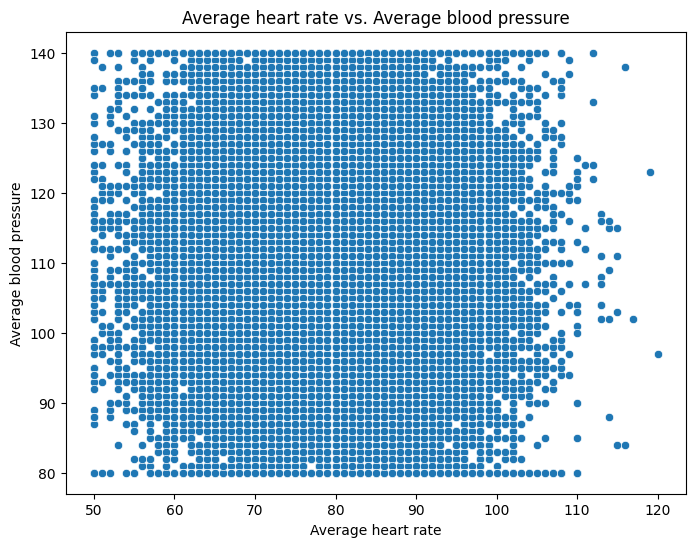

In [27]:
# Visualizing average heart rate and average blood pressure through a scatterplot

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df6, x='average_hr', y='average_bp')
plt.title('Average heart rate vs. Average blood pressure')
plt.xlabel('Average heart rate')
plt.ylabel('Average blood pressure')
plt.show()

# 6. Outliers

## Identifying outliers using the IQR method


In [28]:
# Calculating quartiles and IQR

q1 = np.percentile(df6['average_hr'], 25)
q3 = np.percentile(df6['average_hr'], 75)
iqr = q3 - q1

# Setting threshold for outlier detection

threshold_lower = q1 - 1.5 * iqr
threshold_upper = q3 + 1.5 * iqr

# Identifying outliers

outliers = [x for x in df6['average_hr'] if x < threshold_lower or x > threshold_upper]

# Printing outliers

outliers_list = outliers
outliers_list.sort()
print(outliers_list)

[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 10

## Handling outliers

**Rationale:** I will include the outliers in my data because the information could be important in assessing the patients' health status. It appears these outliers are not due to data entry errors or measurement issues.

# 7. Automated analysis

## Producing an EDA report

In [28]:
# Producing an EDA report as an html file

report = ProfileReport(df6)
report.to_file('eda_report.html')